# Importing Packages

In [163]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score




# Data Reading and Cleaning

In [123]:
Test= pd.read_csv('HousePrice/test.csv') #renaming pre split test data 

In [124]:
Train= pd.read_csv('HousePrice/train.csv') #renaming pre split train data

#### identifying redundant categories, or categories that only represent a small percentage of the houses included 

In [125]:
columns_drop=['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','PoolQC','3SsnPorch','MiscFeature','Fence','FireplaceQu','GarageQual','GarageCond','BsmtFinSF2','BsmtUnfSF','HeatingQC','Electrical','BsmtFullBath','BsmtHalfBath']
columns_drop1=['LandContour','LandSlope','OverallQual','OverallCond','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond']
columns_drop2= ['MSSubClass','GarageType','GarageYrBlt','GarageFinish','LotFrontage','Alley','MSZoning','LotConfig','Condition1','Condition2','RoofStyle','RoofMatl','Foundation','BsmtQual','LowQualFinSF']

In [126]:
columns_to_drop = columns_drop + columns_drop1+columns_drop2

In [127]:
Updated_Test= Test.drop(columns=columns_to_drop)
Updated_Test.isna().sum() #Checking is there are any Nan values present 
Updated_Test.dropna() #dropping any Nan values that were present 

,Id,LotArea,Street,LotShape,Utilities,Neighborhood,BldgType,HouseStyle,YearBuilt,YearRemodAdd,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,11622,Pave,Reg,AllPub,NAmes,1Fam,1Story,1961,1961,...,140,0,0,120,0,0,6,2010,WD,Normal
1,1462,14267,Pave,IR1,AllPub,NAmes,1Fam,1Story,1958,1958,...,393,36,0,0,0,12500,6,2010,WD,Normal
2,1463,13830,Pave,IR1,AllPub,Gilbert,1Fam,2Story,1997,1998,...,212,34,0,0,0,0,3,2010,WD,Normal
3,1464,9978,Pave,IR1,AllPub,Gilbert,1Fam,2Story,1998,1998,...,360,36,0,0,0,0,6,2010,WD,Normal
4,1465,5005,Pave,IR1,AllPub,StoneBr,TwnhsE,1Story,1992,1992,...,0,82,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,1936,Pave,Reg,AllPub,MeadowV,Twnhs,2Story,1970,1970,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,1894,Pave,Reg,AllPub,MeadowV,TwnhsE,2Story,1970,1970,...,0,24,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20000,Pave,Reg,AllPub,Mitchel,1Fam,1Story,1960,1996,...,474,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,10441,Pave,Reg,AllPub,Mitchel,1Fam,SFoyer,1992,1992,...,80,32,0,0,0,700,7,2006,WD,Normal


In [128]:
Updated_Train= Train.drop(columns=columns_to_drop) #Checking if there are any Nan values present 
Updated_Train.isna().sum()

Id               0
LotArea          0
Street           0
LotShape         0
Utilities        0
Neighborhood     0
BldgType         0
HouseStyle       0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
Heating          0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [129]:
Updated_Train.info() # checking the Dtype of the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   LotArea        1460 non-null   int64 
 2   Street         1460 non-null   object
 3   LotShape       1460 non-null   object
 4   Utilities      1460 non-null   object
 5   Neighborhood   1460 non-null   object
 6   BldgType       1460 non-null   object
 7   HouseStyle     1460 non-null   object
 8   YearBuilt      1460 non-null   int64 
 9   YearRemodAdd   1460 non-null   int64 
 10  TotalBsmtSF    1460 non-null   int64 
 11  Heating        1460 non-null   object
 12  CentralAir     1460 non-null   object
 13  1stFlrSF       1460 non-null   int64 
 14  2ndFlrSF       1460 non-null   int64 
 15  GrLivArea      1460 non-null   int64 
 16  FullBath       1460 non-null   int64 
 17  HalfBath       1460 non-null   int64 
 18  BedroomAbvGr   1460 non-null

# Encoding Categorical Columns 
### Since the categories represented are not ordinal I was able to use OneHotEncoder. This was necessary to change the data included to a variable not an object 

#### Encoding the Train Set

In [130]:
categorical_columns = Updated_Train.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse=False)

encoder.fit(Updated_Train[categorical_columns])

encoded_columns = encoder.transform(Updated_Train[categorical_columns])

feature_names = encoder.get_feature_names_out(input_features=categorical_columns)

encoded_df = pd.DataFrame(encoded_columns, columns=feature_names)

Updated_Train.drop(categorical_columns, axis=1, inplace=True)

Updated_Train_encoded = pd.concat([Updated_Train, encoded_df], axis=1)

/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Encoding Test set

In [131]:
categorical_columns = Updated_Test.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse=False)

encoder.fit(Updated_Test[categorical_columns])

encoded_columns = encoder.transform(Updated_Test[categorical_columns])

feature_names = encoder.get_feature_names_out(input_features=categorical_columns)

encoded_df = pd.DataFrame(encoded_columns, columns=feature_names)

Updated_Test.drop(categorical_columns, axis=1, inplace=True)

Updated_Test_encoded = pd.concat([Updated_Train, encoded_df], axis=1)

/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [132]:
Updated_Train_encoded #checking the make sure all objects are now variables

,Id,LotArea,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,2003,2003,856,856,854,1710,2,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,9600,1976,1976,1262,1262,0,1262,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,11250,2001,2002,920,920,866,1786,2,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,9550,1915,1970,756,961,756,1717,1,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,14260,2000,2000,1145,1145,1053,2198,2,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,1999,2000,953,953,694,1647,2,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,1457,13175,1978,1988,1542,2073,0,2073,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,1458,9042,1941,2006,1152,1188,1152,2340,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1459,9717,1950,1996,1078,1078,0,1078,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [133]:
Updated_Test_encoded

,Id,LotArea,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,2003,2003,856,856,854,1710,2,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,9600,1976,1976,1262,1262,0,1262,2,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,11250,2001,2002,920,920,866,1786,2,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,9550,1915,1970,756,961,756,1717,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,14260,2000,2000,1145,1145,1053,2198,2,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,1999,2000,953,953,694,1647,2,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,1457,13175,1978,1988,1542,2073,0,2073,2,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,1458,9042,1941,2006,1152,1188,1152,2340,2,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1459,9717,1950,1996,1078,1078,0,1078,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Creating X and Y variable (isolating sales price to predict on)

In [134]:
X = Updated_Train_encoded.drop(columns='SalePrice')
y = Updated_Train_encoded['SalePrice']

# Pipeline creation 
### Testing different machine learning models to find the lowest RMSE
### Scaling the data so all the variables are on the same scale. Using Standard Scaler within the pipelines

## Pipe Line One: Logistic Regression , Standard Scaler

In [148]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('model', LogisticRegression())
])

pipeline.fit(X, y)


/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [151]:
score = pipeline.score(X, y)

print("Logistic Regression Score:", score)

Logistic Regression Score: 0.8965753424657534


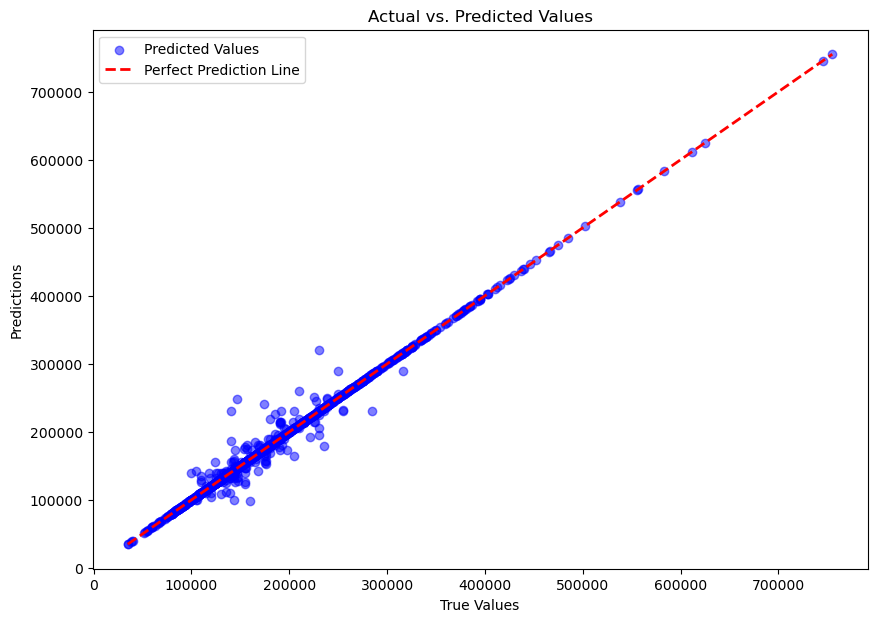

In [154]:
pred = pipeline.predict(X)

plt.figure(figsize=(10, 7))
plt.scatter(y, pred, alpha=0.5, c='b', label='Predicted Values')  # Blue for predicted values
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Actual vs. Predicted Values')

plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=2, label='Perfect Prediction Line')  # Red dashed line

plt.legend()
plt.show()







## Pipeline Two with Standard Scaler, Linear Regression, and GridSearchCV

In [155]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('model', LinearRegression())
])

param_grid = {
}

gridsearch = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  
    cv=5
)

gridsearch.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid={}, scoring='neg_mean_squared_error')

In [156]:
best_model = gridsearch.best_estimator_

best_params = gridsearch.best_params_

In [157]:
best_score = gridsearch.best_score_
print(f"Best Mean Squared Error Score: {best_score}")

Best Mean Squared Error Score: -3.5826464694740505e+34


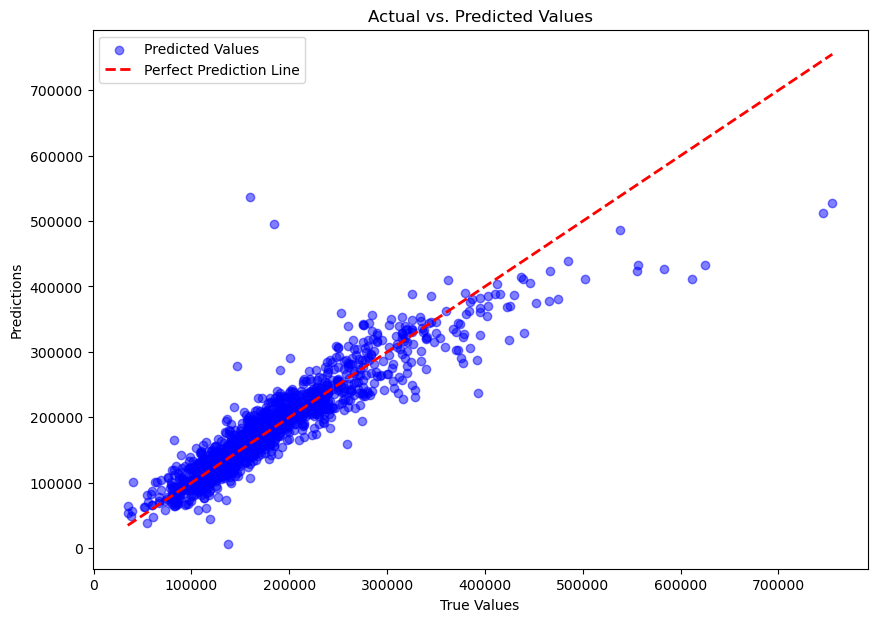

In [158]:

pred = best_model.predict(X)

plt.figure(figsize=(10, 7))
plt.scatter(y, pred, alpha=0.5, c='b', label='Predicted Values')  # Blue for predicted values
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Actual vs. Predicted Values')

plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=2, label='Perfect Prediction Line')  # Red dashed line

plt.legend()  

plt.show()

## Pipe Line: Random Forest, Standard Scaler, GridSearchCV

In [143]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('model', RandomForestRegressor(n_estimators=100, random_state=42)) 
])

param_grid = {
    'model__n_estimators': [100, 200, 300],  
    'model__max_depth': [None, 10, 20, 30], 
    'model__min_samples_split': [2, 5, 10] } 

gridsearch = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  
    cv=5  
)

gridsearch.fit(X, y)




GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [None, 10, 20, 30],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [145]:
best_model = gridsearch.best_estimator_

best_params = gridsearch.best_params_

In [146]:
best_score = gridsearch.best_score_
print(f"Best Mean Squared Error Score: {best_score}")

Best Mean Squared Error Score: -1035710613.6982338


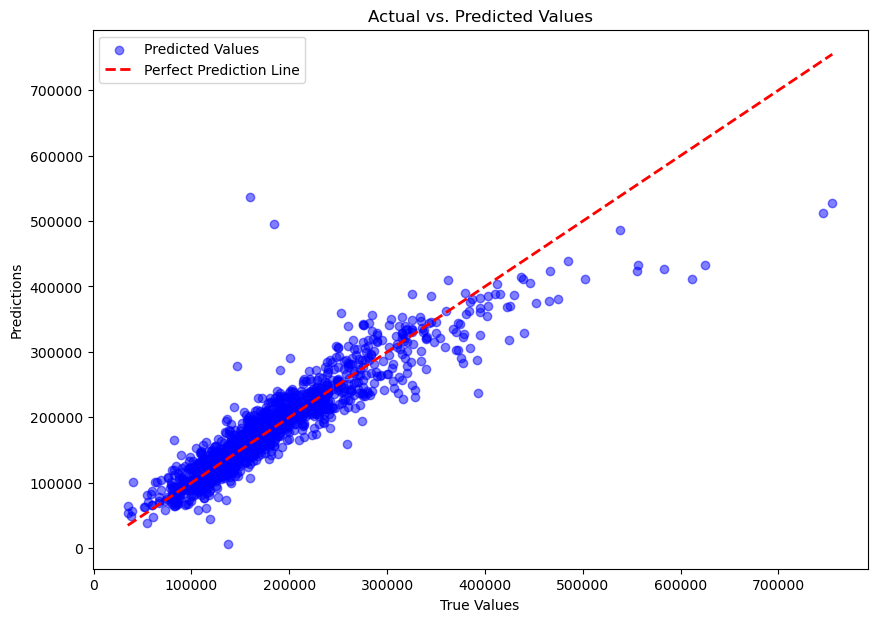

In [176]:

pred = best_model.predict(X)

plt.figure(figsize=(10, 7))
plt.scatter(y, pred, alpha=0.5, c='b', label='Predicted Values')  # Blue for predicted values
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Actual vs. Predicted Values')

plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=2, label='Perfect Prediction Line')  # Red dashed line

plt.legend()  

plt.show()

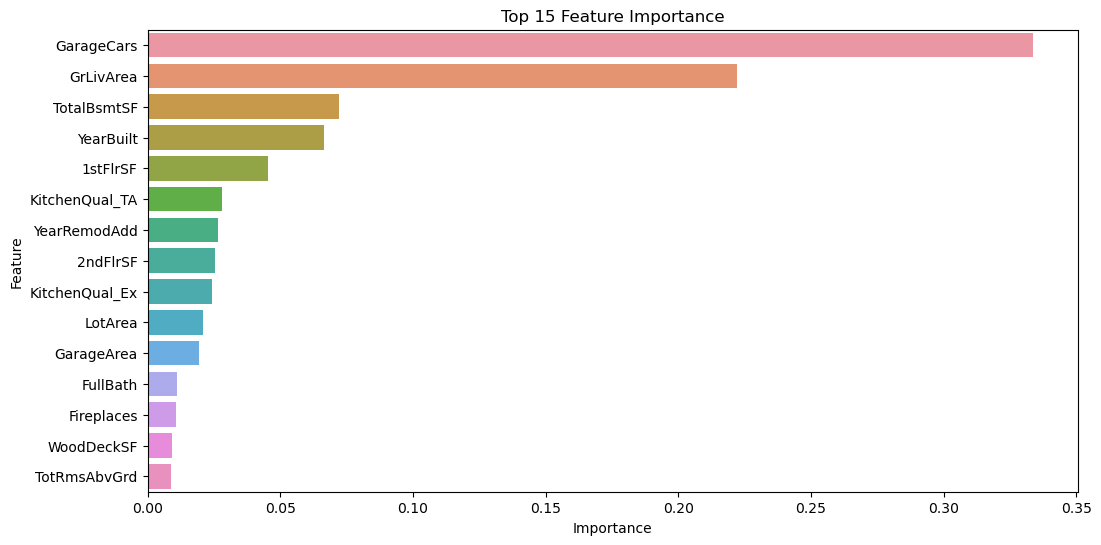

In [177]:
from sklearn.ensemble import RandomForestRegressor

X = Updated_Train_scaled_df.drop("SalePrice", axis=1)  # Features (all columns except SalePrice)
y = Updated_Train_scaled_df["SalePrice"]  # Target variable

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X, y)

feature_importances = model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_15_importance_df = importance_df.head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=top_15_importance_df)
plt.title('Top 15 Feature Importance')
plt.show()





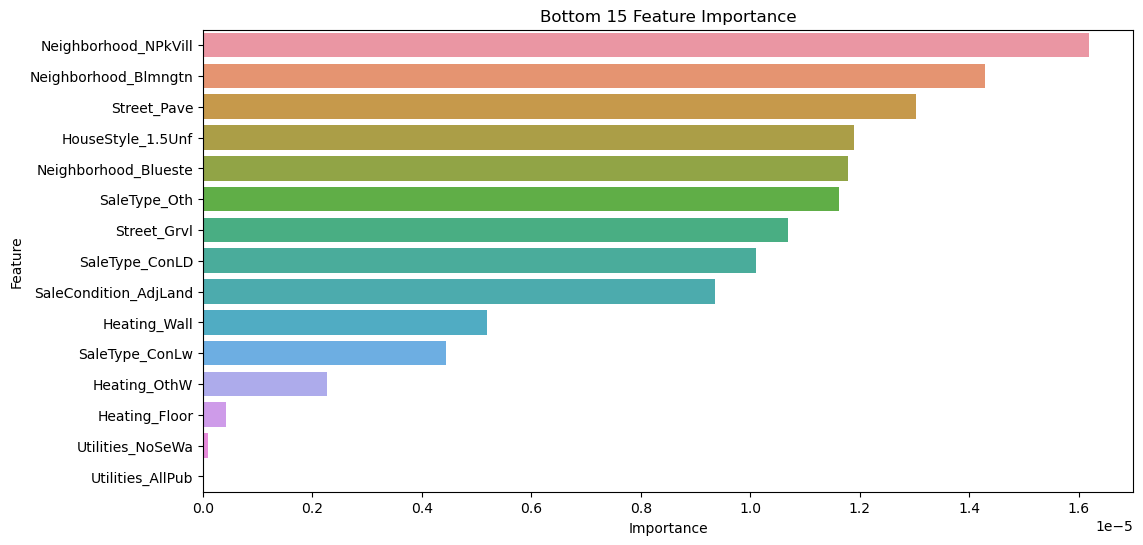

In [178]:
low_15_importance_df = importance_df.tail(15)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=low_15_importance_df)
plt.title('Bottom 15 Feature Importance')
plt.show()


# Conclusion 

## In conclusion, this code showcases the process of tackling a house price prediction problem by employing various machine learning models and data preprocessing techniques. It begins with data reading and cleaning, proceeds with encoding categorical features, and splits the data into input features and the target variable. Multiple machine learning pipelines are constructed, and each model's performance is evaluated using RMSE as a metric.

## Furthermore, feature importance is analyzed using a Random Forest Regressor to identify the top and bottom important features. While the code provides a solid foundation for solving the problem, there's still room for further exploration and model optimization to enhance predictive accuracy.

## To continue improving the model, one could experiment with different regression algorithms, fine-tune hyperparameters, consider feature engineering, and evaluate model performance on a separate test dataset. Additionally, cross-validation is essential for assessing the model's robustness and generalization to unseen data.

## In summary, this code demonstrates a structured approach to tackling a regression problem and lays the groundwork for future refinements and model selection.